# Restaurant Risk Prediction

## Import

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load

In [ ]:
df = pd.read_csv('Restaurant_Scores.csv')

In [ ]:
df.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,85936,Laurel Court,950 Mason St,San Francisco,CA,94108,NaN,NaN,NaN,1.415578e+10,...,100.0,Routine - Unscheduled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5827,HILLCREST ELEMENTARY SCHOOL,810 SILVER Ave,San Francisco,CA,94134,37.729016,-122.419253,POINT (-122.419253 37.729016),1.415546e+10,...,NaN,Reinspection/Followup,NaN,NaN,NaN,92.0,92.0,2.0,2.0,7.0
2,94910,Ike's Kitchen,800 Van Ness Ave,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,NaN,New Ownership - Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,64667,Jasmine Rae Bakery,1890 Bryant St #309,San Francisco,CA,94110,37.763156,-122.410351,POINT (-122.410351 37.763156),NaN,...,NaN,Reinspection/Followup,NaN,NaN,NaN,53.0,53.0,3.0,2.0,20.0
4,97722,THE CHURRO FACTORY,PIER 39 K-01,San Francisco,CA,94133,NaN,NaN,NaN,NaN,...,96.0,Routine - Unscheduled,97722_20181217_103154,Unclean or degraded floors walls or ceilings,Low Risk,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53973 entries, 0 to 53972
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   business_id                   53973 non-null  int64  
 1   business_name                 53973 non-null  object 
 2   business_address              53973 non-null  object 
 3   business_city                 53973 non-null  object 
 4   business_state                53973 non-null  object 
 5   business_postal_code          52787 non-null  object 
 6   business_latitude             27475 non-null  float64
 7   business_longitude            27475 non-null  float64
 8   business_location             27460 non-null  object 
 9   business_phone_number         17672 non-null  float64
 10  inspection_id                 53973 non-null  object 
 11  inspection_date               53973 non-null  object 
 12  inspection_score              39541 non-null  float64
 13  i

## Null Value Check

In [ ]:
df.isna().sum()

business_id                         0
business_name                       0
business_address                    0
business_city                       0
business_state                      0
business_postal_code             1186
business_latitude               26498
business_longitude              26498
business_location               26513
business_phone_number           36301
inspection_id                       0
inspection_date                     0
inspection_score                14432
inspection_type                     0
violation_id                    13720
violation_description           13720
risk_category                   13720
Neighborhoods                   26538
SF Find Neighborhoods           26538
Current Police Districts        26526
Current Supervisor Districts    26526
Analysis Neighborhoods          26526
dtype: int64

There are many null values in most of the columns, which will be cleaned later on.

## Unique value counts

In [ ]:
df.apply(lambda x: len(x.unique()))

business_id                      6253
business_name                    5775
business_address                 5673
business_city                       1
business_state                      1
business_postal_code               63
business_latitude                2296
business_longitude               2324
business_location                2373
business_phone_number            1932
inspection_id                   26663
inspection_date                   813
inspection_score                   48
inspection_type                    15
violation_id                    40211
violation_description              66
risk_category                       4
Neighborhoods                     111
SF Find Neighborhoods             111
Current Police Districts           11
Current Supervisor Districts       12
Analysis Neighborhoods             42
dtype: int64

## Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53973 entries, 0 to 53972
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   business_id                   53973 non-null  int64  
 1   business_name                 53973 non-null  object 
 2   business_address              53973 non-null  object 
 3   business_city                 53973 non-null  object 
 4   business_state                53973 non-null  object 
 5   business_postal_code          52787 non-null  object 
 6   business_latitude             27475 non-null  float64
 7   business_longitude            27475 non-null  float64
 8   business_location             27460 non-null  object 
 9   business_phone_number         17672 non-null  float64
 10  inspection_id                 53973 non-null  object 
 11  inspection_date               53973 non-null  object 
 12  inspection_score              39541 non-null  float64
 13  i

### Rename some of the columns

In [ ]:
df = df.rename({'Neighborhoods': 'neighborhoods'}, axis=1)

### Postal Code

In [ ]:
df['business_postal_code'].unique()

array(['94108', '94134', '94109', '94110', '94133', '94117', '94107',
       '94115', '94112', '94103', '94121', '94124', '94122', '94105',
       '94123', '94132', '94114', '94158', '94127', nan, '94102', '94116',
       '94111', '94118', '94104', '95122', '94131', '94013', '92672',
       '94130', 'CA', '941', '941033148', '941102019', '94123-3106',
       '95105', '94101', '94120', '64110', '94544', '94080', '94188',
       '94143', '00000', 'Ca', '94602', '94122-1909', '94301', '95132',
       '95117', '94901', '94102-5917', '94124-1917', '95112',
       '94105-1420', '94621', '94117-3504', '94518', '94105-2907',
       '94014', '94129', '95133', '95109'], dtype=object)

In [ ]:
repl = {'CA': np.nan, 'Ca': np.nan, '941': np.nan, '00000': np.nan, # Invalid values
        '64110': '94110', # Mistype values
        '941033148': '94103', '941102019': '94110', # Wrong values
        '94123-3106': '94123', '94122-1909': '94122', '94102-5917': '94102', '94124-1917': '94124', # Ranged values
        '94105-1420': '94105', '94117-3504': '94117', '94105-2907': '94105'
        }
df['business_postal_code'] = df['business_postal_code'].replace(repl)

In [ ]:
df['business_postal_code'].unique()

array(['94108', '94134', '94109', '94110', '94133', '94117', '94107',
       '94115', '94112', '94103', '94121', '94124', '94122', '94105',
       '94123', '94132', '94114', '94158', '94127', nan, '94102', '94116',
       '94111', '94118', '94104', '95122', '94131', '94013', '92672',
       '94130', '95105', '94101', '94120', '94544', '94080', '94188',
       '94143', '94602', '94301', '95132', '95117', '94901', '95112',
       '94621', '94518', '94014', '94129', '95133', '95109'], dtype=object)

### Inspection Type

In [ ]:
df['inspection_type'].unique()

array(['Routine - Unscheduled', 'Reinspection/Followup',
       'New Ownership - Followup', 'New Construction', 'New Ownership',
       'Complaint', 'Non-inspection site visit', 'Structural Inspection',
       'Complaint Reinspection/Followup',
       'Foodborne Illness Investigation', 'Community Health Assessment',
       'Routine - Scheduled', 'Special Event',
       'Administrative or Document Review', 'Multi-agency Investigation'],
      dtype=object)

There are many different inspection types that we need to reduce into few categories:

*   Routine
*   New
*   Investigation
*   Complaint


In [ ]:
inspection_type_routine = dict.fromkeys(['Routine - Unscheduled', 'Reinspection/Followup', 'Routine - Scheduled'], 'Routine')
inspection_type_new = dict.fromkeys(['New Construction', 'New Ownership', 'New Ownership - Followup'], 'New')
inspection_type_investigation = dict.fromkeys(['Structural Inspection', 'Non-inspection site visit', 'Foodborne Illness Investigation', 'Special Event', 'Multi-agency Investigation', 'Administrative or Document Review', 'Community Health Assessment'], 'Investigation')
inspection_type_complaint = dict.fromkeys(['Complaint', 'Complaint Reinspection/Followup'], 'Complaint')

In [ ]:
df['inspection_type'] = df['inspection_type'].replace(inspection_type_routine)
df['inspection_type'] = df['inspection_type'].replace(inspection_type_new)
df['inspection_type'] = df['inspection_type'].replace(inspection_type_investigation)
df['inspection_type'] = df['inspection_type'].replace(inspection_type_complaint)

In [ ]:
df['inspection_type'].unique()

array(['Routine', 'New', 'Complaint', 'Investigation'], dtype=object)

Encode the inspection type

In [ ]:
df['inspection_type'] = df['inspection_type'].replace({'Routine':1, 'Complaint':2, 'New':3, 'Investigation':4})

### Inspection Date

In [ ]:
len(df['inspection_date'].unique())

813

In [ ]:
df['inspection_date'] = df['inspection_date'].str.rstrip(' 12:00:00 AM')
df['inspection_year'] = pd.DatetimeIndex(df['inspection_date']).year
df['inspection_month'] = pd.DatetimeIndex(df['inspection_date']).month
df['inspection_day'] = pd.DatetimeIndex(df['inspection_date']).day
df = df.drop('inspection_date', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [ ]:
df[['inspection_day', 'inspection_month', 'inspection_year']]

,inspection_day,inspection_month,inspection_year
0,25,9,2017
1,24,2,2017
2,30,5,2018
3,14,8,2017
4,17,12,2018
...,...,...,...
53968,13,9,2017
53969,28,2,2019
53970,9,12,2016
53971,14,8,2019


### Violation Id

In [ ]:
df['violation_id'].unique()

array([nan, '97722_20181217_103154', '95023_20180510_103149', ...,
       '100215_20190911_103133', '101670_20190626_103131',
       '95021_20190228_103119'], dtype=object)

As violation_id is in form of 'business-id'_'date'_'unique-violation-id', we only need violation id

In [ ]:
df['violation_id'] = df['violation_id'].str.split('_').str[2]

In [ ]:
df['violation_id'].unique()

array([nan, '103154', '103149', '103119', '103124', '103150', '103103',
       '103131', '103144', '103102', '103105', '103161', '103134',
       '103108', '103139', '103109', '103133', '103142', '103116',
       '103148', '103129', '103120', '103172', '103132', '103114',
       '103156', '103118', '103157', '103147', '103145', '103130',
       '103153', '103125', '103121', '103112', '103143', '103162',
       '103152', '103127', '103177', '103141', '103151', '103135',
       '103107', '103123', '103138', '103136', '103115', '103104',
       '103113', '103110', '103158', '103165', '103160', '103159',
       '103106', '103175', '103122', '103155', '103173', '103137',
       '103128', '103117', '103126', '103170', '103171'], dtype=object)

### Violation Description

In [ ]:
len(df['violation_description'].unique())

66

In [ ]:
df['violation_description'].unique()

array([nan, 'Unclean or degraded floors walls or ceilings',
       'Wiping cloths not clean or properly stored or inadequate sanitizer',
       'Inadequate and inaccessible handwashing facilities',
       'Inadequately cleaned or sanitized food contact surfaces',
       'Improper or defective plumbing',
       'High risk food holding temperature',
       'Moderate risk vermin infestation',
       'Unapproved or unmaintained equipment or utensils',
       'Unclean hands or improper use of gloves',
       'Improper cooling methods', 'Low risk vermin infestation',
       'Other moderate risk violation',
       'Contaminated or adulterated food', 'Improper food storage',
       'Unclean or unsanitary food contact surfaces',
       'Foods not protected from contamination',
       'Unclean nonfood contact surfaces',
       'Inadequate food safety knowledge or lack of certified food safety manager',
       'No thermometers or uncalibrated thermometers',
       'Insufficient hot water or runni

There are many different violations done by resturants, we need to reduce the description into some categories.

We will categories the violations into 4 simple types:

*   Hygiene
*   Legal
*   Noncompliance
*   Lack of Infrastructure


In [ ]:
violation_hygiene = dict.fromkeys(['Unclean or degraded floors walls or ceilings', 'Wiping cloths not clean or properly stored or inadequate sanitizer', 'Moderate risk vermin infestation', 'Unclean nonfood contact surfaces', 'Foods not protected from contamination', 'Unclean hands or improper use of gloves', 'High risk vermin infestation', 'Inadequately cleaned or sanitized food contact surfaces', 'Low risk vermin infestation', 'Unclean or unsanitary food contact surfaces', 'Employee eating or smoking', 'Contaminated or adulterated food', 'Unsanitary employee garments hair or nails', 'Other low risk violation', 'Unclean unmaintained or improperly constructed toilet facilities', 'Other moderate risk violation', 'Sewage or wastewater contamination', 'Food in poor condition', 'Other high risk violation', 'Reservice of previously served foods', 'Discharge from employee nose mouth or eye', 'Improperly washed fruits and vegetables'], 'Hygiene')
violation_lack_infra = dict.fromkeys(['Inadequate and inaccessible handwashing facilities', 'Inadequate or unsanitary refuse containers or area or no garbage service', 'No thermometers or uncalibrated thermometers', 'Improper or defective plumbing', 'No hot water or running water', 'Inadequate ventilation or lighting', 'Inadequate warewashing facilities or equipment', 'Inadequate sewage or wastewater disposal', 'Insufficient hot water or running water', 'No restroom facility within 200 feet of mobile food facility'], 'Lack_Infrastructure')
violation_legal = dict.fromkeys(['Food safety certificate or food handler card not available', 'Unapproved or unmaintained equipment or utensils', 'Permit license or inspection report not posted', 'No plan review or Building Permit', 'Unapproved  living quarters in food facility', 'Unpermitted food facility', 'Unapproved food source', 'Mobile food facility stored in unapproved location', 'Mobile food facility not operating with an approved commissary', 'Mobile food facility with unapproved operating conditions'], 'Legal')
violation_noncompliance = dict.fromkeys(['High risk food holding temperature', 'Inadequate food safety knowledge or lack of certified food safety manager', 'Improper storage of equipment utensils or linens', 'Improper food storage', 'Improper thawing methods', 'Moderate risk food holding temperature', 'Improper cooling methods', 'Improper storage use or identification of toxic substances', 'Improper food labeling or menu misrepresentation', 'Improperly displayed mobile food permit or signage', 'Non service animal', 'Noncompliance with shell fish tags or display', 'Noncompliance with HAACP plan or variance', 'Inadequate HACCP plan record keeping', 'Inadequate dressing rooms or improper storage of personal items', 'Improper reheating of food', 'Inadequate procedures or records for time as a public health control', 'Worker safety hazards', 'No person in charge of food facility', 'Improper cooking time or temperatures', 'Unauthorized or unsafe use of time as a public health control measure', 'Consumer advisory not provided for raw or undercooked foods', 'Noncompliance with Gulf Coast oyster regulation', 'Noncompliance with Cottage Food Operation'], 'Noncompliance')

In [ ]:
df['violation_description'] = df['violation_description'].replace(violation_hygiene)
df['violation_description'] = df['violation_description'].replace(violation_lack_infra)
df['violation_description'] = df['violation_description'].replace(violation_legal)
df['violation_description'] = df['violation_description'].replace(violation_noncompliance)

In [ ]:
df['violation_description'].unique()

array([nan, 'Hygiene', 'Lack_Infrastructure', 'Noncompliance', 'Legal'],
      dtype=object)

Encode the violation type

In [ ]:
df = df.rename({'violation_description': 'violation_type'}, axis=1)

In [ ]:
df['violation_type'] = df['violation_type'].replace({'Hygiene':1, 'Noncompliance':2, 'Lack_Infrastructure':3, 'Legal':4})

### Risk Category

In [ ]:
df['risk_category'].unique()

array([nan, 'Low Risk', 'Moderate Risk', 'High Risk'], dtype=object)

In [ ]:
df['risk_category'] = df['risk_category'].replace({'Low Risk':1, 'Moderate Risk':2, 'High Risk':3})

### Drop less important columns

In [ ]:
dropped = ['business_name', 'business_address', 'business_city', 'business_state', 'business_location', 'business_phone_number', 'inspection_id', 'inspection_type', 'SF Find Neighborhoods', 'Current Police Districts', 'Current Supervisor Districts', 'Analysis Neighborhoods']
df = df.drop(dropped, axis=1)

### Fix Datatypes

In [ ]:
df = df.convert_dtypes()

### Remove null values

In [ ]:
df.isnull().sum()

business_id                 0
business_postal_code     1223
business_latitude       26498
business_longitude      26498
inspection_score        14432
violation_id            13720
violation_type          13720
risk_category           13720
neighborhoods           26538
inspection_year             0
inspection_month            0
inspection_day              0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20299 entries, 110 to 38312
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   business_id           20299 non-null  Int64  
 1   business_postal_code  20299 non-null  string 
 2   business_latitude     20299 non-null  Float64
 3   business_longitude    20299 non-null  Float64
 4   inspection_score      20299 non-null  Int64  
 5   violation_id          20299 non-null  string 
 6   violation_type        20299 non-null  Int64  
 7   risk_category         20299 non-null  Int64  
 8   neighborhoods         20299 non-null  Int64  
 9   inspection_year       20299 non-null  Int64  
 10  inspection_month      20299 non-null  Int64  
 11  inspection_day        20299 non-null  Int64  
dtypes: Float64(2), Int64(8), string(2)
memory usage: 2.2 MB


## Visualization

Text(0, 0.5, 'count')

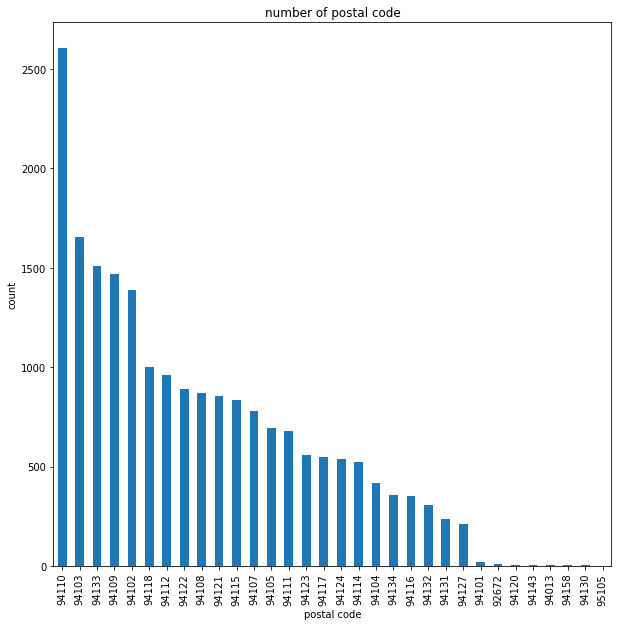

In [ ]:
plt.figure(figsize=(10,10))
df['business_postal_code'].value_counts().plot(kind='bar')
plt.title('number of postal code')
plt.xlabel('postal code')
plt.ylabel('count')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

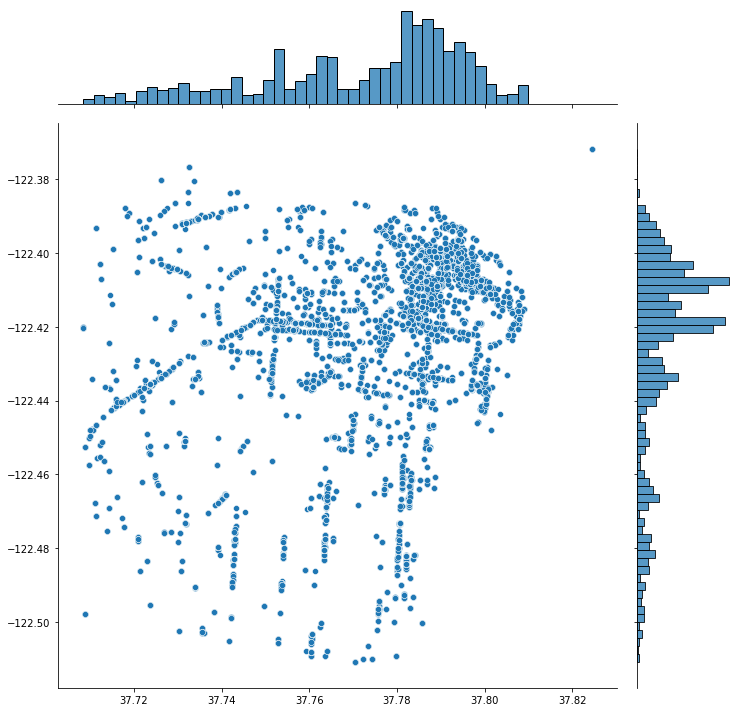

In [ ]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df['business_latitude'].values, y=df['business_longitude'].values, size=10)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()

<Figure size 720x720 with 0 Axes>

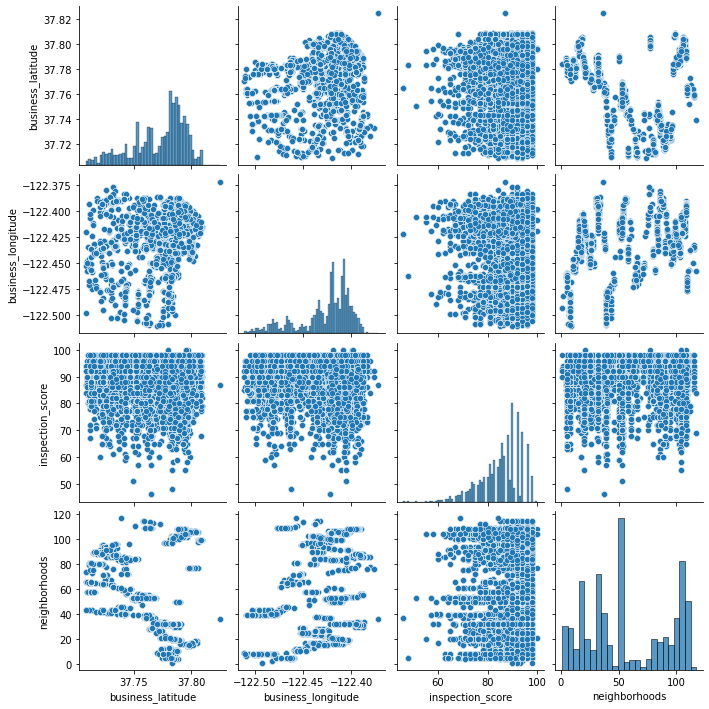

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(data=df[['business_latitude', 'business_longitude', 'inspection_score', 'neighborhoods']])

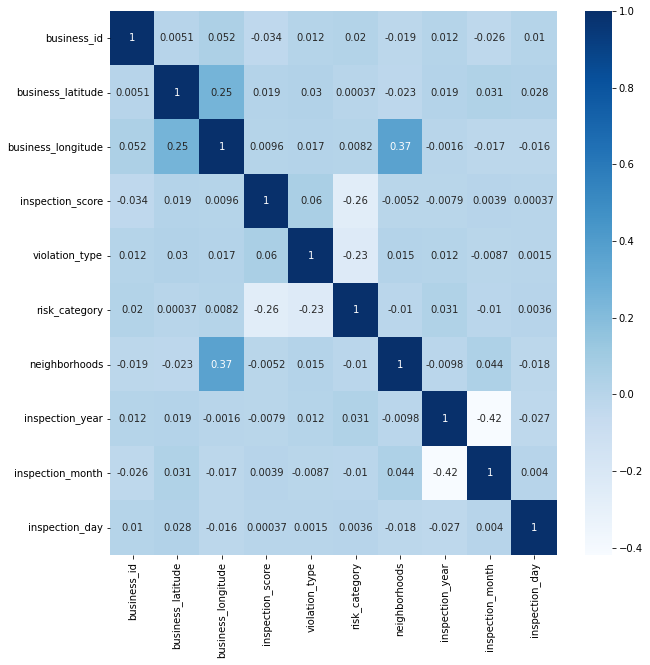

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap="Blues", annot=True)

## Saving Cleaned Dataset

In [ ]:
df

,business_id,business_postal_code,business_latitude,business_longitude,inspection_score,violation_id,violation_type,risk_category,neighborhoods,inspection_year,inspection_month,inspection_day
110,3649,94103,37.765708,-122.409002,82,103131,1,2,53,2017,12,6
111,2929,94109,37.790523,-122.413158,98,103142,1,1,50,2018,6,4
113,3025,94122,37.754086,-122.47835,88,103149,1,1,39,2018,3,14
114,2334,94110,37.755693,-122.40665,88,103116,2,2,53,2017,11,28
115,37350,94103,37.785386,-122.403723,94,103149,1,1,32,2019,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...
38297,68998,94118,37.7828,-122.463274,94,103145,2,1,5,2018,10,26
38300,66584,94112,37.717042,-122.440524,90,103120,2,2,90,2018,4,30
38302,67182,94103,37.767525,-122.410737,96,103143,3,1,53,2017,7,31
38307,70090,94103,37.770126,-122.415342,93,103105,2,3,32,2017,1,5


In [ ]:
df.to_csv('restaurant_cleaned.csv', index=False)